In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load Data-Delivery_time

In [2]:
df=pd.read_csv("Delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Check correlation between Delivery time vs Sorting time

In [6]:
correlation=df.corr()
print(correlation)

               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


from the correlation matrix delivery time and sorting time are strongly correlated

## Univariate Analysis -Numerical features

In [7]:
#plot the boxplot the numeric features `Delivery time` and `Sorting time` as 2x2 subplots

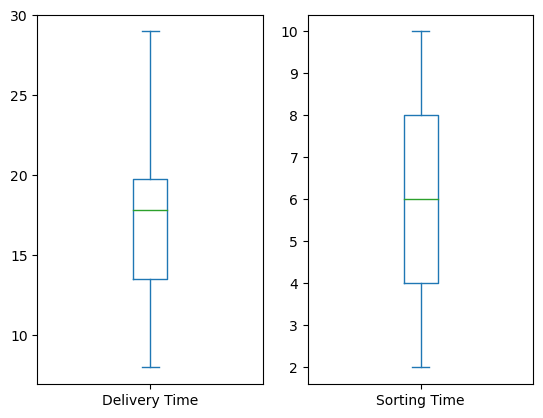

In [8]:
df.plot(kind='box',subplots=True)
plt.show()

In [9]:
#plot the distribution plot of Delivery time and Sorting time

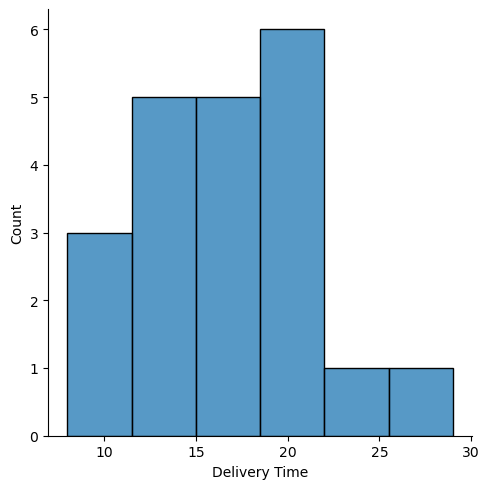

In [10]:
sns.displot(df["Delivery Time"])
xlabel='DeliveryTime'
ylabel='Density'
plt.show()

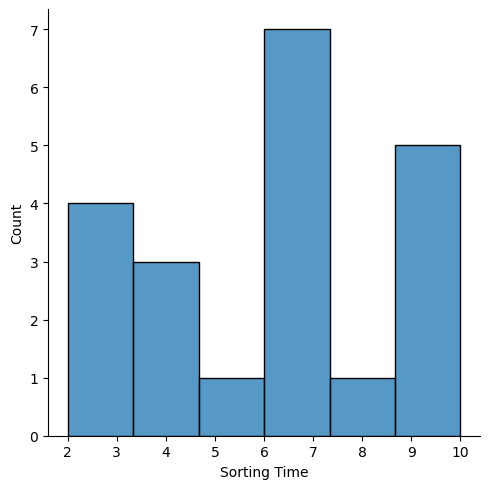

In [11]:
sns.displot(df["Sorting Time"])
xlabel='DeliveryTime'
ylabel='Density'
plt.show()

In [12]:
q3 = df['Delivery Time'].quantile(0.75)
q1 = df['Delivery Time'].quantile(0.25)
q3,q1

(19.75, 13.5)

In [13]:
IQR = q3 - q1
UB = q3 + (1.5*IQR)
LB = q1 - (1.5*IQR)
UB,LB

(29.125, 4.125)

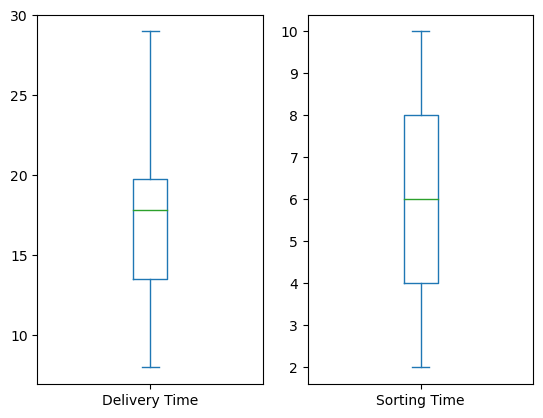

In [14]:
df.plot(kind='box',subplots= True);

No outliers

## Missing Value Check

In [15]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Feature Engineering

In [27]:
df1=df.rename({"Delivery Time":"delivery","Sorting Time":"sorting"},axis=1)
df1

,delivery,sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


No missing value in the data

## Fit a simple Linear Regression Model

In [28]:
from statsmodels.formula.api import ols

In [30]:
# create a formula string & fit the model and print the model summary
formula = 'delivery~sorting'
model = ols(formula=formula,data=df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:04:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

# Visualize the simple linear Model

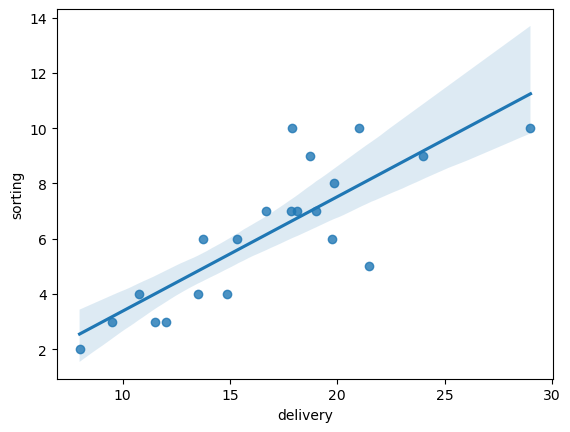

In [31]:
# regplot
sns.regplot(data=df1, x='delivery',y='sorting');

In [32]:
# R-square
from sklearn.metrics import r2_score

## Prediction Using the model

In [48]:
# create a dataframe with values 32,35 for `deivery_time` feature. call it `new_data`
new_data = pd.DataFrame({'sorting': [32, 35]})

In [49]:
new_data

,sorting
0,32
1,35


In [50]:
# predict the `sorting_time` values for `new_data`
model.predict(new_data)

0    59.351371
1    64.298430
dtype: float64

In [37]:
import statsmodels.formula.api as smf

In [51]:
model=smf.ols("delivery~sorting",data=df1).fit()

## Model Validation

In [42]:
#finding coefficients of parameters
model.params

Intercept    6.582734
sorting      1.649020
dtype: float64

In [45]:
# model.tvalues and pvalues
model.tvalues

Intercept    3.823349
sorting      6.387447
dtype: float64

In [46]:
model.pvalues

Intercept    0.001147
sorting      0.000004
dtype: float64

In [47]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model prediction

In [53]:
#predict delivery time for soting time 10
sorting=10
delivery=6.582734+1.649020*sorting

In [54]:
delivery

23.072933999999997

In [62]:
New_Data=pd.DataFrame({"sorting":[13,17]})

In [63]:
New_Data

,sorting
0,13
1,17


In [58]:
model.predict(N)

,sorting
0,NaN
1,NaN
